hello world!


In [ ]:
pip install numpy matplotlib pandas

Downsized sample is a linear graph because there aren't enough data points


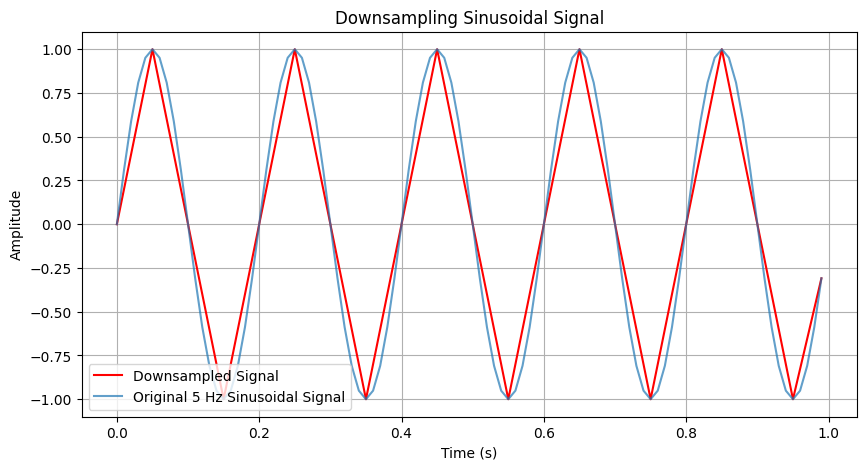

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

downsample_factor = 5

def downsample_sin(signal: np.array):
    # input signal: frequency 5, sample gap = 0.01 s
    
    # downsize the array by the factor
    downsampled_indices = np.arange(0, len(signal), downsample_factor)

    # Finding the peaks and troughs
    diff_arr = np.diff(signal)
    troughs = np.where((diff_arr[:-1] < 0) & (diff_arr[1:] > 0))[0] + 1
    peaks = np.where((diff_arr[:-1] > 0) & (diff_arr[1:] < 0))[0] + 1
    # Combine and sort indices of extrema
    extrema_indices = np.sort(np.concatenate((peaks, troughs)))
    # Combining the indices
    combined_indices = np.unique(np.concatenate((downsampled_indices, extrema_indices)))
    # adding the last index
    last_index = len(signal) - 1
    combined_indices = np.unique(np.append(combined_indices, last_index))

    # Get the downsampled signal (y values)
    downsampled_signal = signal[combined_indices]

    
    # Plot the downsized signal
    plt.figure(figsize=(10, 5))
    plt.plot(t[combined_indices], downsampled_signal, color='red', label='Downsampled Signal')

    return downsampled_signal



# Test the function
t = np.arange(0, 1, 0.01)  # Time vector (0 to 1 second, sampled every 0.01s)
frequency = 5  # 5 Hz
signal = np.sin(2 * np.pi * frequency * t)


# call the function (plots within the function to follow function guidelines of the assignment)
downsampled_signal = downsample_sin(signal)
# Plot the original signal
plt.plot(t, signal, label='Original 5 Hz Sinusoidal Signal', alpha=0.7)

print("Downsized sample is a linear graph because there aren't enough data points")

# More plot info
plt.title('Downsampling Sinusoidal Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()
plt.show()

### Q2 

#### part 1

Plot the price of all the laptops

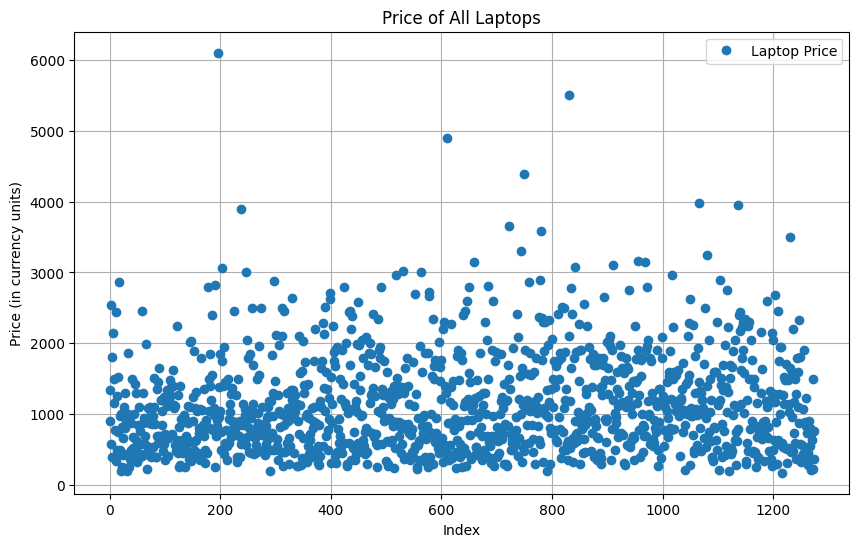

In [ ]:
# Path to the laptop dataset
file_path = 'laptop_price - dataset.csv'

# Reading the CSV file, saving as a dataframe
data = pd.read_csv(file_path)

# Plot the laptop prices on a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data.index, data['Price (Euro)'], marker='o', alpha=0.8)
plt.title('Price of All Laptops')
plt.xlabel('Index')
plt.ylabel('Price (in currency units)')
plt.grid()
plt.legend()
plt.show()

#### Part 2

Which company has on average the most expensive laptop? What is the average
laptop price for each company?

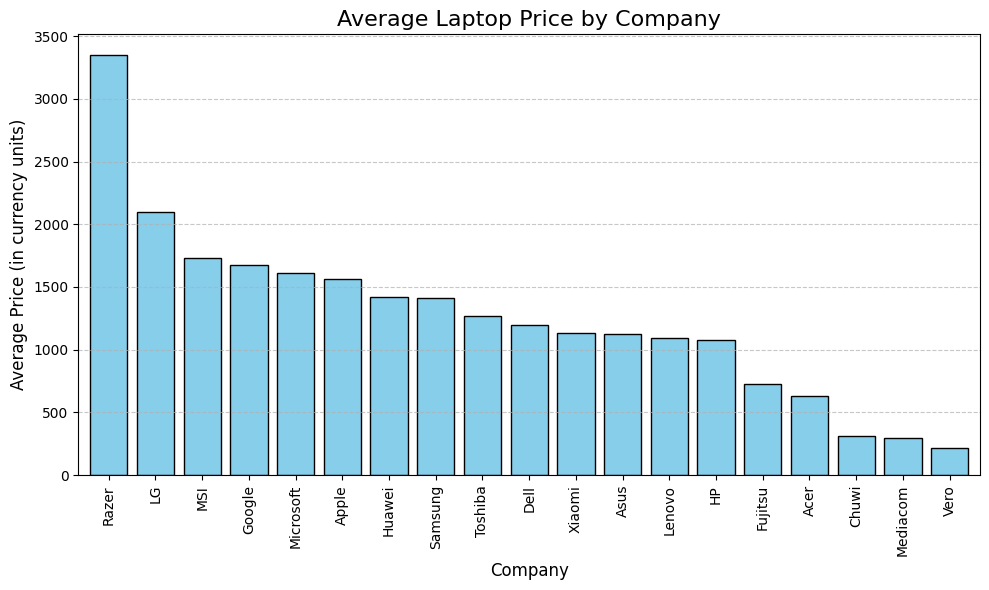

In [16]:
grouped = data.groupby('Company')

# Group the data by company
average_price = grouped['Price (Euro)'].mean()

# Sort the average prices from largest to smallest
average_price_sorted = average_price.sort_values(ascending=False)

# Plot the average prices as a bar graph
plt.figure(figsize=(10, 6))
average_price_sorted.plot(kind='bar', width = 0.8 ,color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Average Laptop Price by Company', fontsize=16)
plt.xlabel('Company', fontsize=12)
plt.ylabel('Average Price (in currency units)', fontsize=12)
plt.xticks(rotation=90, fontsize = 10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

#### Part 3

Find the different types of Operating systems present in the data - under the column
name 'OpSys'.
- Please note - there are operating systems that are the same systems and just
written differently in the column - please fix them to be uniform.

In [ ]:
# Defining operating system names:
mac_str = 'Mac OS'
windows_str = 'Windows'

# Cleaning - Replacing the data to be uniform
data['OpSys'] = data['OpSys'].replace({'macOS':mac_str, 'Mac OS X':mac_str, 'Windows 10':windows_str, 'Windows 10 S':windows_str, 'Windows 7':windows_str})

# Print the fixed uniform operating systems
OP_Systems_Fixed = data['OpSys'].unique()
print("After Fix: ", OP_Systems_Fixed)

After Fix:  ['Mac OS' 'No OS' 'Windows' 'Linux' 'Android' 'Chrome OS']


#### Part 4

Plot for each of the operating system types the distribution of the prices, so that the
number of plots equals to the number of unique operating systems.

['Mac OS' 'No OS' 'Windows' 'Linux' 'Android' 'Chrome OS']


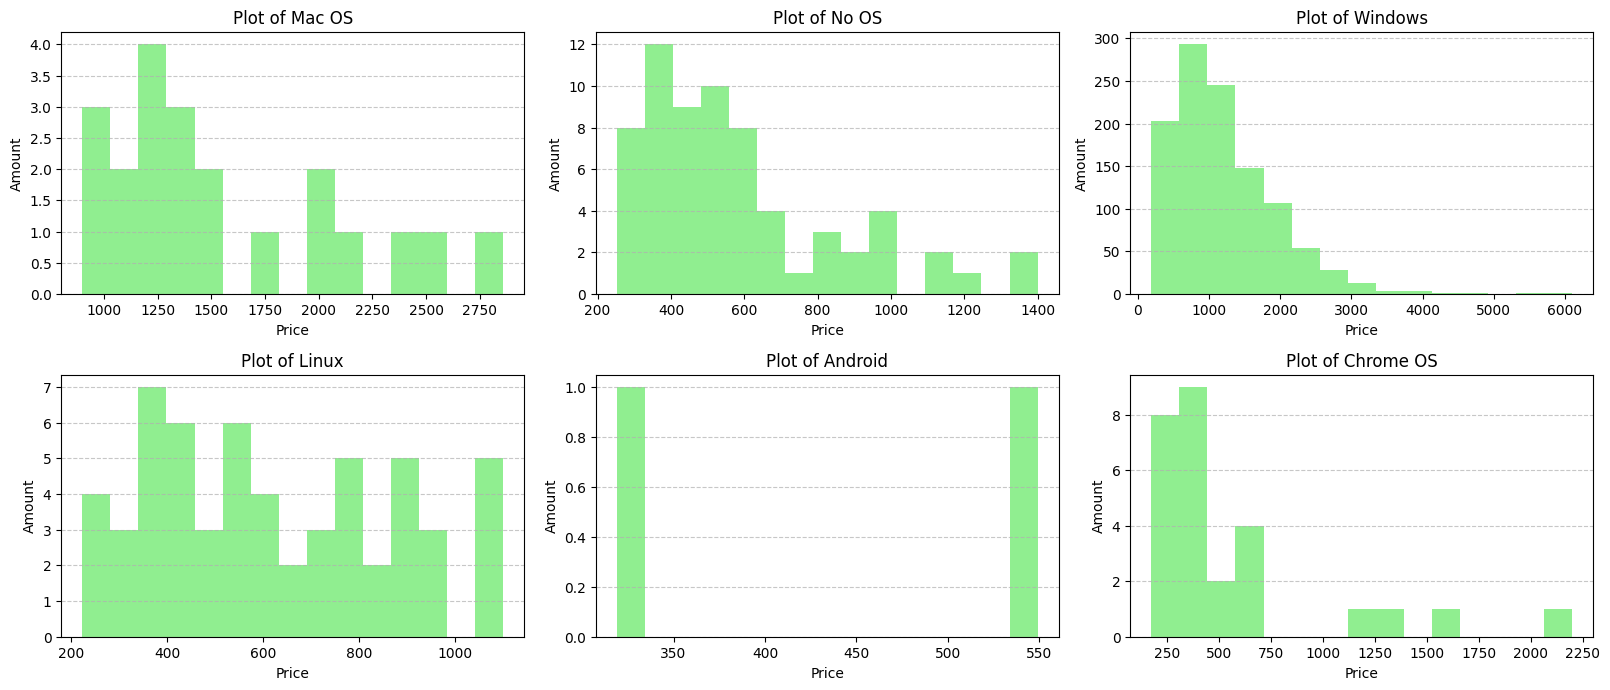

In [19]:
# Getting the different types of OS
unique_opsys = data['OpSys'].unique()
print(unique_opsys)

# Creating the plot
plt.figure(figsize= (16,10))

# Looping through each operating system and subplotting it
for i, op_sys in enumerate(unique_opsys, 1):
    plt.subplot(3, 3, i)
    data[data['OpSys'] == op_sys]['Price (Euro)'].hist(bins=15, color='lightgreen', grid=False)
    plt.title(f"Plot of {op_sys}")
    plt.xlabel("Price")
    plt.ylabel("Amount")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
plt.tight_layout()
plt.show()